<a href="https://colab.research.google.com/github/jacobaparker/qnc/blob/main/Probability%20Distributions/Python/Bernoulli.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/PennNGG/Quantitative-Neuroscience/blob/master/Probability%20Distributions/Python/Bernoulli.ipynb)

# Definition

The Bernoulli distribution is a discrete probability distribution that describes the probability of obtaining each of just two possible outcomes, a "success" with probability p and a "failure" with probability *q* = 1 – *p*. A Bernoulli trial describes a single experiment with binary outcomes described by a Bernoulli distribution, in which the probabilities of success and failure are fixed. An example of a Bernoulli trial is a coin flip, with *p* = *q* = 0.5.

The Bernoulli distribution is a special case of the binomial distribution with *n* = 1. Thus, the probability of obtaining *k* successes in 1 trial given a constant probability of success *p* is:

[1]  $P(X=k\: successes)=p^{k}(1-p)^{1-k}, \textrm{for}\: k\in \left \{0, 1  \right \}$

# Getting Started with Code

Matlab code is found in the [NGG Statistics GitHub Repository](https://github.com/PennNGG/Statistics.git) under "Probability Distributions/Bernoulli.m".

Python code is included below. First run the code cell just below to make sure all of the required Python modules are loaded, then you can run the other cell(s).

In [2]:
import random as rnd
from scipy.stats import bernoulli

# Tutorial


Execute the cell below to simulate a bernoulli process in several different ways

In [3]:
# In Python we can use random, which produces a random variable on the interval 
#   [0,1), which means that all values are greater than or equal to 0 and less 
#   than 1. This function is park of the "random" package imported above as "rnd".
p = 0.7 # choose value for p
single_outcome_method_1 = rnd.random() < p # create logical variable from single pick
print(f"outcome using rand = {single_outcome_method_1}") # print the result

# Or, equivalently, use bernoulli, which is a function in scipy.stats that 
#   generates a random pick from a Bernoulli distribution.
# Choose value for p
p = 0.7  
# Generate a single sample using the rvs ("random variates") method. 
#   To generate >1 sample, use the size argument
single_outcome_method_2 = bernoulli.rvs(p, size=1) 
# Print the output
print(f'outcome using binornd = {bool(single_outcome_method_2)}')

# Now generate lots of Bernoulli trials to check if it is converging on the 
#   appropriate probability
# Choose value for p
p = 0.7  
# Number of Bernoulli trials to simulate
N = 10000
# Use the size argument to generate outcomes (an ndarray) from lot of trials
outcomes = bernoulli.rvs(p, size=N) 
type(outcomes)
print(f'{(outcomes == False).sum()} zeros, {(outcomes == True).sum()} ones, simulated p = {(outcomes == True).sum()/outcomes.size}, empirical p = {p}')

outcome using rand = True
outcome using binornd = True
2924 zeros, 7076 ones, simulated p = 0.7076, empirical p = 0.7


# Neuroscience Examples

1. A bedrock of [psychophysics](https://www.sciencedirect.com/science/article/pii/S0306452214004369) – the quantitative study of behavior, particularly as it relates to perception – is the use of tasks that require binary outcomes (e.g., yes/no responses). For these experiments, each trial that uses the same task configuration represents a Bernoulli trial. A [psychometric function](https://link.springer.com/article/10.3758%2FBF03194552) describes the (typically sigmoid-shaped) relationship between the probability of success (*p*) associated with the Bernoulli distribution for each task condition and the value of the systematically varied independent variable (e.g., stimulus strength for a detection task). A good overview of the kinds of binary choice trials used in psychophysical tasks is in Box 1 of [this paper](https://www.frontiersin.org/articles/10.3389/fnins.2011.00125/full).

2. Neural spiking is considered an all-or-nothing phenomenon. Thus, at any given instant of time, you can think of the spiking output of a neuron as the outcome of a Bernoulli trial: a success (spike) or failure (no spike). However, we rarely, if ever, care about whether or not a spike occurred at just a single moment. Instead, we are concerned with longer intervals, which are better analyzed using binomial and Poisson distributions, as detailed [here](http://www.cns.nyu.edu/~david/handouts/poisson.pdf).

# A crude simulation of a psychometric function through several Bernoulli distributions

Based on Figure 1a of [this paper](https://www.frontiersin.org/articles/10.3389/fnins.2011.00125/full)

Text(0, 0.5, 'Proportion Detected')

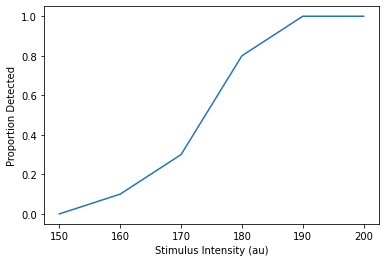

In [11]:
import matplotlib.pyplot as plt

# ground truth p values
p_vals = [0.01, 0.1, 0.25, 0.7, 0.99, 0.999]

# stimulus intensity values corresponding to pvals
I = range(150,210,10)

#pretend we only do 10 trials at each stimulus intensity, reflecting the kinds
#of constraints we might be dealing with when performing experiments
N = 10

# p values measured empirically
p_emp = [(bernoulli.rvs(p, size=N) == True).sum()/N for p in p_vals]

fig, ax = plt.subplots()
ax.plot(I,p_emp)
ax.set_xlabel('Stimulus Intensity (au)')
ax.set_ylabel('Proportion Detected')

# Additional Resources

Working with the Bernoulli distribution in [Matlab](https://www.mathworks.com/help/stats/bernoulli-distribution.html), [R](https://www.rdocumentation.org/packages/Rlab/versions/2.15.1/topics/Bernoulli), and [Python](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.bernoulli.html).

# Credits

Copyright 2021 by Joshua I. Gold, University of Pennsylvania